In [11]:
from simuPark.park import SalitrePark
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

park = SalitrePark(
    fn = fn,
    fastpass_pool_size=0.3,
)

park.start_day(max_entry_rate=95000/960, wait_time_update=5)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:19<00:00, 48.53it/s]


39152
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


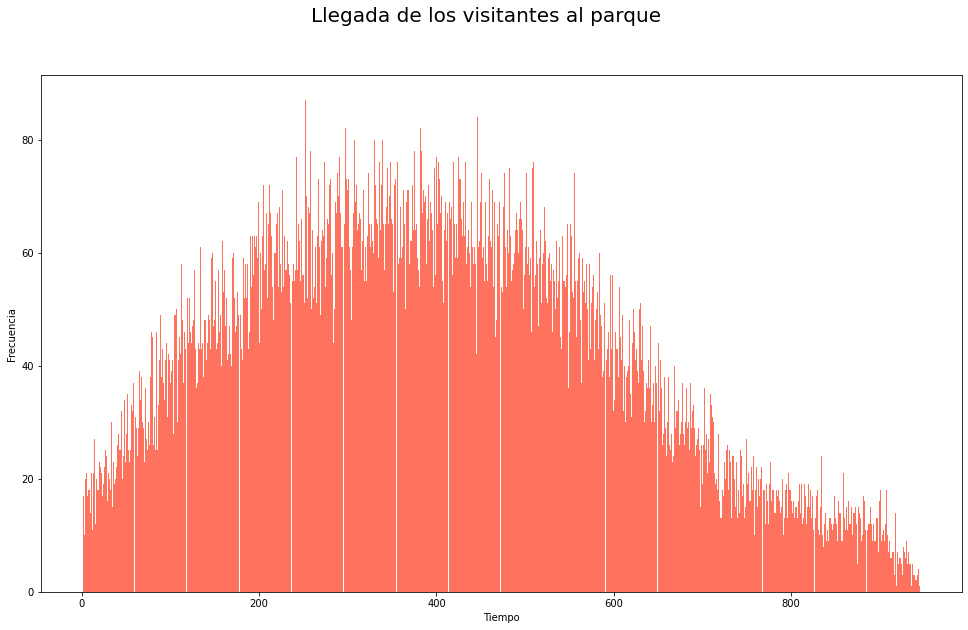

In [12]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [13]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'fastpass?',
    'fastpass_used',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.fastpass)
    current_guest.append(guest.fastpass_used)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
# guest_df.to_csv(r'./datasets/DFP.csv')
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,fastpass_used,total_wait_time,average_wait_time
0,Average,1,570,569,50,7,0,82,11.714286
1,Average,1,427,426,50,4,0,63,15.750000
2,All Day Park,1,567,566,40,7,0,146,20.857143
3,Attraction Enjoyer,1,530,529,70,12,0,202,16.833333
4,Tourist,1,504,503,60,9,0,251,27.888889
...,...,...,...,...,...,...,...,...,...
39147,All Day Park,944,960,16,40,1,0,12,12.000000
39148,Average,944,960,16,50,0,0,15,0.000000
39149,Attraction Enjoyer,944,960,16,70,0,0,0,0.000000
39150,Tourist,944,960,16,60,0,0,0,0.000000


Atracciones experimentadas promedio: 3.4355843890478135
Atracciones experimentadas desviación estandar: 2.9259591275740022


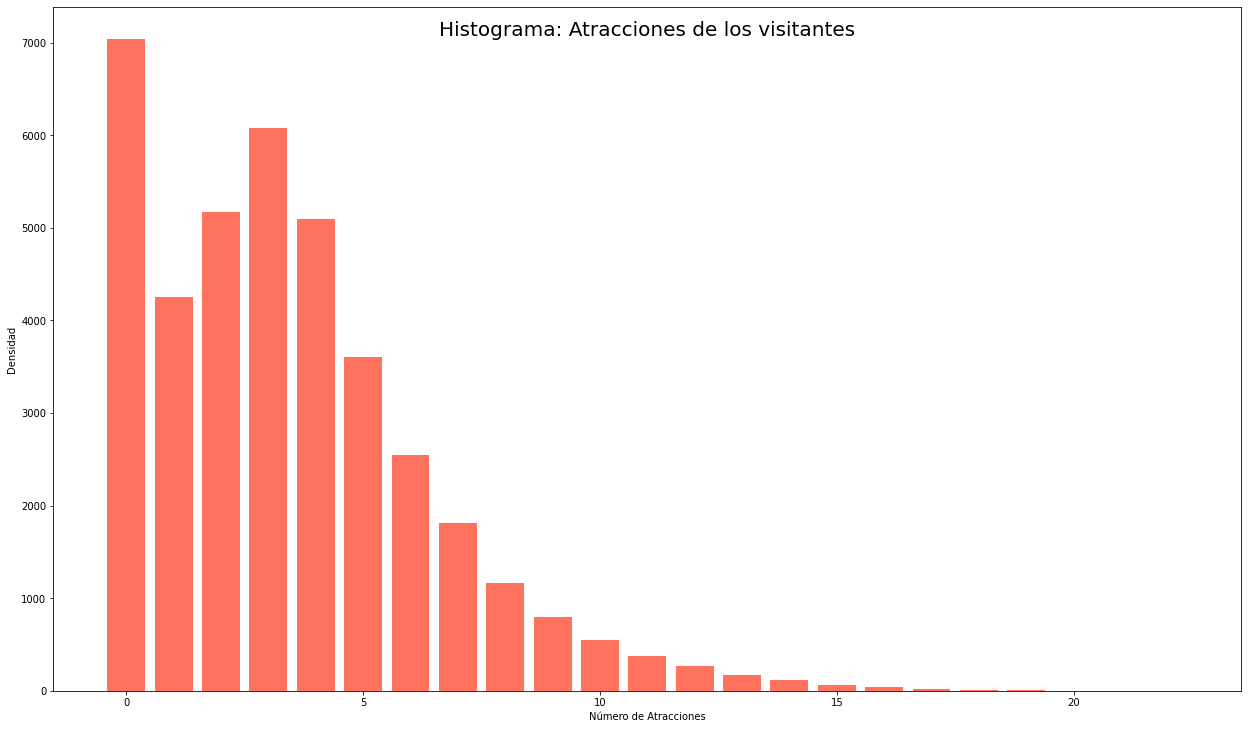

In [14]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

44.06970227619443
(43.74712334225183, 44.39228121013702)
32118
168.0


Text(0, 0.5, 'Densidad')

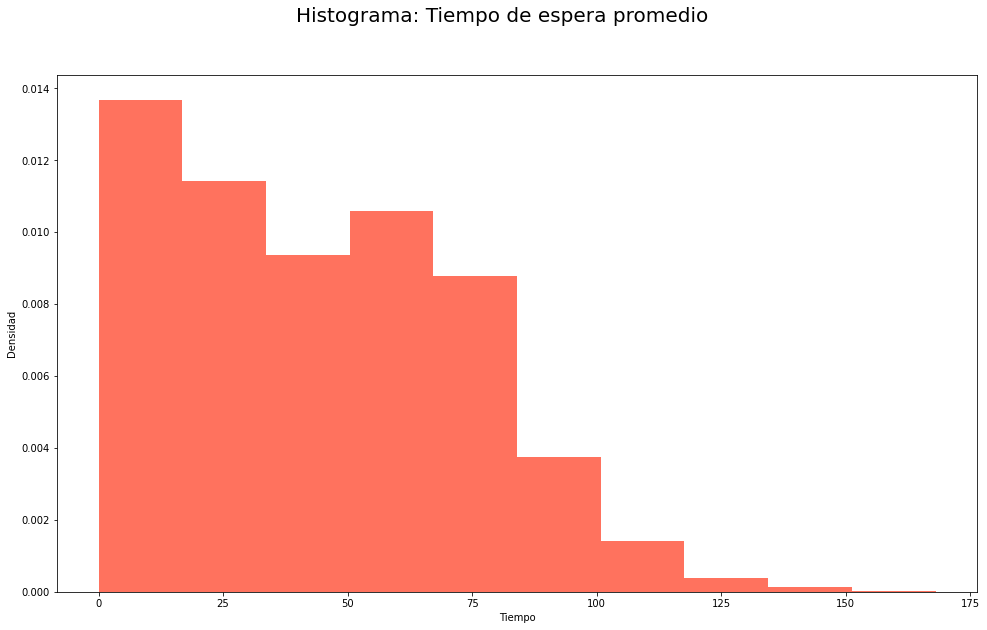

In [15]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)


print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')

In [16]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,30
1,Expedition Everest,10
2,Flight of Passage,55
3,Kali River Rapids,10
4,Kilimanjaro Safaris,30
5,Na'vi River Journey,45
6,TriceraTop Spin,0


In [17]:
attr_alt_wait_time = [[attr.name, attr.alt_queue.top_wait_time] for attr in park.attractions]
attr_df_alt = pd.DataFrame(attr_alt_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df_alt

,Name,MaximunWaitTime
0,DINOSAUR,0
1,Expedition Everest,0
2,Flight of Passage,35
3,Kali River Rapids,0
4,Kilimanjaro Safaris,0
5,Na'vi River Journey,35
6,TriceraTop Spin,0


In [18]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()



id: 3784  arvTime: 124 things_done: ['Kilimanjaro Safaris', 'Flight of Passage', 'Flight of Passage', 'Kilimanjaro Safaris', "Na'vi River Journey", "Na'vi River Journey", 'Kilimanjaro Safaris', 'DINOSAUR', 'DINOSAUR', 'Kilimanjaro Safaris', 'Expedition Everest', 'DINOSAUR', 'DINOSAUR', 'DINOSAUR', 'Kilimanjaro Safaris', 'DINOSAUR', 'Kilimanjaro Safaris', 'Kali River Rapids', 'Kali River Rapids', 'Expedition Everest', 'Kilimanjaro Safaris', "Na'vi River Journey"] attrExp: 22
queues_joined: 22 total_wait_time: 315 archetype: All Day Park
fastpass? True


In [19]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()

park.attractions[0].queue.max_in_queue


id: 35926  arvTime: 713 things_done: ['DINOSAUR'] attrExp: 1
queues_joined: 2 total_wait_time: 168 archetype: Average
fastpass? None


1509

In [20]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

7034